In [1]:
import sys
import asyncio
import logging
import numpy as np
import matplotlib.pyplot as plt
from lsst.ts.externalscripts.auxtel.latiss_cwfs_align import LatissCWFSAlign
import time
from lsst.ts import salobj

In [2]:
# Temporarily needed to run at summit
import os
os.environ["LSST_DDS_DOMAIN"] = 'lsatmcs'
os.environ["OSPL_URI"] = "file:///home/patrickingraham/ospl.xml"

In [3]:
script = LatissCWFSAlign(index=1, remotes=False)
script.dataPath='/project/shared/auxTel/'

In [4]:
stream_handler = logging.StreamHandler(sys.stdout)
# if you want logging
logger = logging.getLogger()
logger.addHandler(stream_handler)
logger.level = logging.DEBUG

In [5]:
# script.filter='BG40'
# script.grating = 'empty_1'
# script.exposure_time = 30

In [6]:
# offset = {'x':0.5  , 'y': 0. , 'z':  0.0}
# await script.attcs.ataos.cmd_offset.set_start(**offset)

In [7]:
# await script.latiss.take_engtest(exptime=2,n=1)

In [8]:
#apply hexapod focus offset
#await script.hexapod_offset(-0.02458927)
#await script.attcs.ataos.cmd_resetOffset.start()

In [9]:
script.binning = 1

Using binning factor of 1
Using binning factor of 1


In [18]:
script.intra_visit_id = 2020031200289
script.extra_visit_id = 2020031200290
script.angle = 61.7-37.9 # elev - nas2 

#script.intra_visit_id = 2020031200274
#script.extra_visit_id = 2020031200275
#script.angle = 0 # elev - nas2 


start_time=time.time()
await script.run_cwfs()
end_time=time.time()
print('WFE fitting took {0:0.3f} seconds'.format(end_time-start_time)) # 56.7s

Running cwfs in 2020031200289/2020031200290.


/home/patrickingraham/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False


Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000289.yaml
AT_O_20200312_000289: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000289: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000289.yaml
AT_O_20200312_000289: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000289: Dark time less than exposure time. Setting dark time to the exposure time.


/home/patrickingraham/repos/ts_externalscripts/python/lsst/ts/externalscripts/auxtel/latiss_cwfs_align.py:310: FutureWarning: Config field doAddDistortionModel is deprecated: Camera geometry is incorporated when reading the raw files. This option no longer is used, and will be removed after v19.
  isrConfig.doAddDistortionModel = False
Exception ignored in: <function SqlRegistry.__del__ at 0x7f5664845440>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7/Linux64/daf_persistence/19.0.0-2-gf01c5b1+1/python/lsst/daf/persistence/registries.py", line 319, in __del__
    self.conn.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 140007570319104 and this is thread id 140002377856768.
Exception ignored in: <function SqlRegistry.__del__ at 0x7f5664845440>
Traceback (most recent call last):
  File "/opt/lsst/software/stack/stack/miniconda3-4.7.12-984c9f7

Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000290.yaml
AT_O_20200312_000290: Forcing detector serial to ITL-3800C-068
AT_O_20200312_000290: Forcing SHUTTIME header to be None
Using translation class LSST_LATISS
Checking for header correction file named LATISS-AT_O_20200312_000290.yaml
AT_O_20200312_000290: Forcing detector serial to ITL-3800C-068
Using translation class LSST_LATISS
AT_O_20200312_000290: Dark time less than exposure time. Setting dark time to the exposure time.
Running source detection algorithm
Measured zernike coeficients: [10.330176024715389, 10.174665647514658, 14.413887618990408]
De-rotated zernike coeficients: [13.55763289  5.14071476 14.41388762]
Hexapod offset: [ 0.10349338 -0.0392421  -0.00343188]
Telescope offsets: [ 6.20960285 -2.35452584  0.        ]

WFE fitting took 59.958 seconds


In [19]:
# await script.latiss.take_engtest(exptime=2,n=1)

In [20]:
# await script.attcs.ataos.cmd_applyAxisOffset.set_start(axis='y', offset=-0.2)
# offset = {'x':-0.5 , 'y':0., 'z': 0.}
# await script.attcs.ataos.cmd_offset.set_start(**offset)

In [21]:
# await script.attcs.slew_object('HD 68450', pa_ang=70)

Measured zernike coeficients: [10.330176024715389, 10.174665647514658, 14.413887618990408]
De-rotated zernike coeficients: [13.55763289  5.14071476 14.41388762]
Hexapod offset: [ 0.10349338 -0.0392421  -0.00343188]
Telescope offsets: [ 6.20960285 -2.35452584  0.        ]

[ 14.41388762 109.10247004  88.32677859  10.33017602  10.17466565
  -5.7931215   -9.8417697   46.38113595   0.7143392 ]


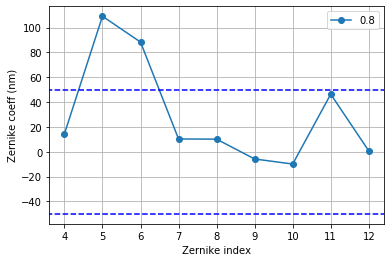

In [22]:
# print results
script.show_results()
# plot zernikes
x = np.arange(9)+4
plt.plot(x, script.algo.zer4UpNm[:9], 'o-', label=f'{script.dz}')
xlim = plt.xlim()
plt.plot(np.arange(15), np.zeros(15)+50, 'b--')
plt.plot(np.arange(15), np.zeros(15)-50, 'b--')
plt.xlim(xlim)
plt.ylabel("Zernike coeff (nm)")
plt.xlabel("Zernike index")
plt.grid()
plt.legend()

print(script.algo.zer4UpNm[:9])

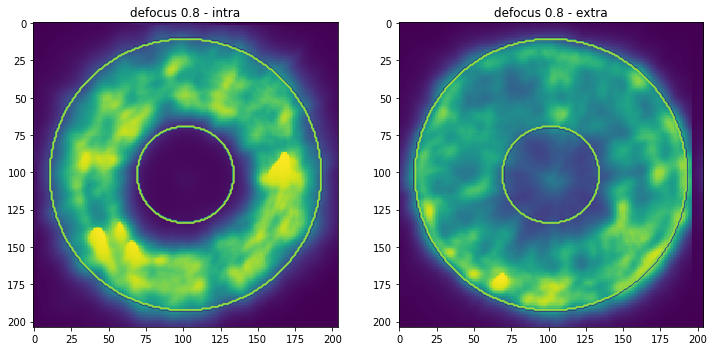

In [23]:
# plot image and mask
fig1 = plt.figure(1, figsize=(12,8))
ax11 = fig1.add_subplot(121)
ax11.set_title("defocus 0.8 - intra")
ax11.imshow(script.I1[0].image0)
ax11.contour(script.algo.pMask) 
ax12 = fig1.add_subplot(122)
ax12.set_title("defocus 0.8 - extra")
ax12.imshow(script.I2[0].image0)
ax12.contour(script.algo.pMask) 

## Take an in-focus image?

In [24]:
# if True:
#     # Start a logger to publish observer notes to the EFD
#     # find it using SELECT "message" FROM "efd"."autogen"."lsst.sal.Script.logevent_logMessage" WHERE time > :dashboardTime:
#     comment_log_controller = salobj.Controller("Script", index=1)
#     #comment_log_controller.evt_logMessage.set_put(message="Starting In-focus post CWFS data current target: {}".format(target_name))
#     comment_log_controller.evt_logMessage.set_put(message="Test: {}".format(time.time()))
#     tmp = latiss.take_object(exptime=15, n=1)

In [25]:
# tmp = await script.attcs.atptg.evt_currentTarget.next(flush=True, timeout=15)
# print(tmp)

In [ ]:
# tmp = await script.attcs.atptg.evt_heartbeat.next(flush=True, timeout=15)